# EECS 731 Final Project - Clothing One
## Anomaly Detection

In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
reviews = pickle.load(open("../Data/reviews.pkl", "rb" ))
rented_for_encoding = pickle.load(open("../Data/rented_for_encoding.pkl", "rb"))
body_type_encoding = pickle.load(open("../Data/body_type_encoding.pkl", "rb"))
category_encoding = pickle.load(open("../Data/category_encoding.pkl", "rb"))

In [3]:
old_size = len(reviews)
reviews
#static rule remove all products with less than 100 reviews
reviews = reviews.loc[reviews['age'].apply(lambda a :a > 12 and a < 80)]
number_removed = old_size - len(reviews)
number_removed

111

In [4]:
old_size = len(reviews)
#static rule remove all products with less than 100 reviews
itemCounts = reviews['item_id'].value_counts()
reviews = reviews.loc[reviews['item_id'].apply(lambda p : itemCounts[p] >= 50)]
number_removed = old_size - len(reviews)
number_removed

67020

In [5]:
itemCounts.head()

126335    1526
123793    1354
174086    1273
127865    1115
145906    1110
Name: item_id, dtype: int64

In [6]:
len(reviews)

79250

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [8]:
# We want to first drop unrealist data like age 0 and age 117

# Also drop age < 14 since rent the runway started renting child size clothes in April 2019 which means none of the clothes should be targeted toward children
#, age > 75 since this is not the target demographic that makes up the bulk of orders meaning the bulk of returns

### Ⅰ. Univariate
-- Rules Applied: 3σ rule and boxplot

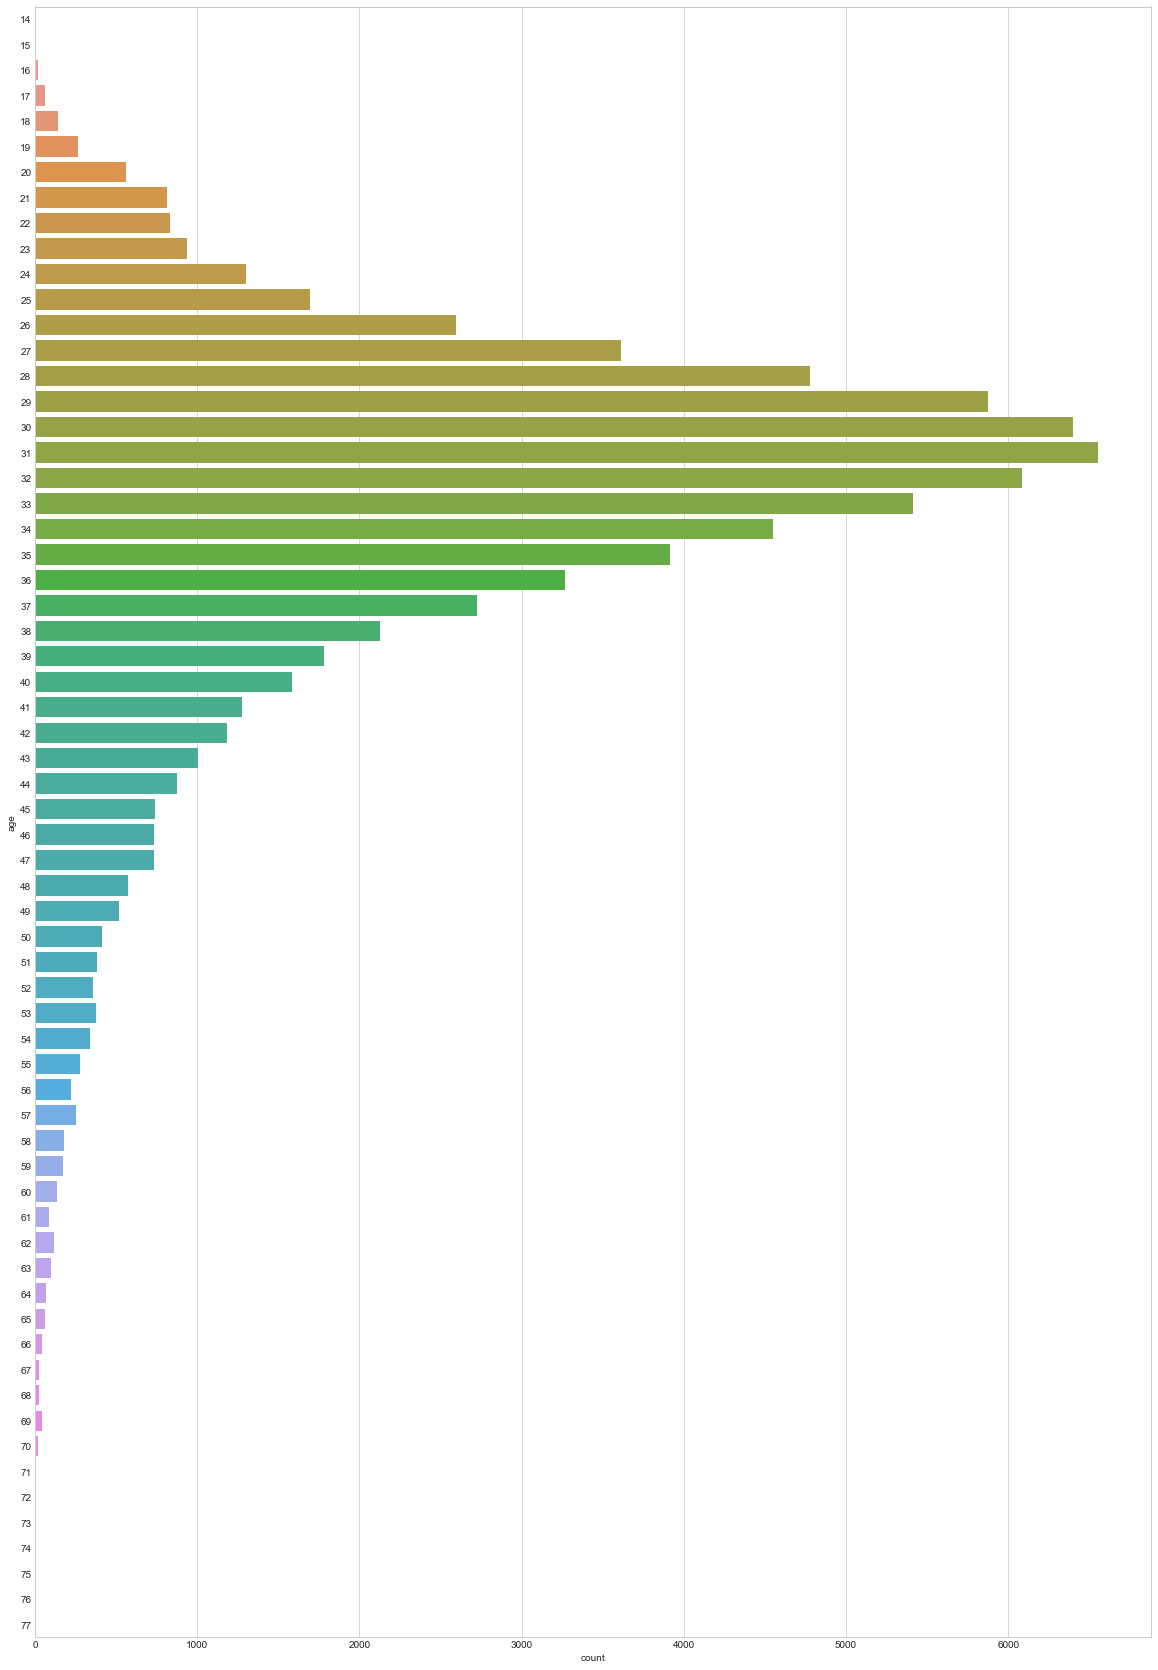

In [9]:
data_bin = pd.DataFrame()

data_bin['age'] = reviews['age']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (20, 30)) 
sns.countplot(y = "age", data = data_bin);

In [10]:
def three_sigma(Ser1):
    rule = (Ser1.mean()-3*Ser1.std()>Ser1) | (Ser1.mean()+3*Ser1.std()< Ser1)
    index = np.arange(Ser1.shape[0])[rule]
    outrange = Ser1.iloc[index]
    return outrange

data_anomaly_age = three_sigma(reviews['age'])
print("Count: ", data_anomaly_age.count())
print("Min: ", data_anomaly_age.min())
print("Max: ", data_anomaly_age.max())
print("Anomalies:")
data_anomaly_age

Count:  1349
Min:  57
Max:  77
Anomalies:


6         65
205       59
212       58
887       58
1327      62
1375      70
1525      59
1569      60
1607      57
1668      64
1689      58
1698      57
1702      69
1750      59
1836      59
1862      57
1940      59
2036      59
2100      62
2229      61
2264      58
2508      59
2536      68
2632      57
2768      59
2892      58
3023      66
3092      58
3266      68
3325      57
          ..
143806    66
143862    64
143934    60
144054    57
144279    60
144336    58
144395    59
144585    57
144646    70
144716    60
144805    65
144820    63
144867    57
145017    66
145023    62
145217    59
145366    58
145416    69
145445    66
145481    66
145578    59
145585    60
145747    58
145830    60
145976    62
145986    60
146030    72
146033    58
146109    69
146137    63
Name: age, Length: 1349, dtype: int64

In [11]:
reviews_age60 = reviews.loc[reviews['age'] < 60]
data_anomaly_age = three_sigma(reviews_age60['age'])
print("Count: ", data_anomaly_age.count())
print("Min: ", data_anomaly_age.min())
print("Max: ", data_anomaly_age.max())
print("Anomalies:")
data_anomaly_age

Count:  1102
Min:  55
Max:  59
Anomalies:


150       56
205       59
212       58
270       55
847       56
887       58
1525      59
1607      57
1689      58
1698      57
1750      59
1836      59
1862      57
1940      59
2036      59
2085      55
2264      58
2481      55
2508      59
2632      57
2768      59
2892      58
3055      55
3092      58
3306      56
3325      57
3462      58
3494      56
3580      56
3717      57
          ..
142569    57
142867    56
142987    56
143048    58
143123    55
143252    57
143293    57
143301    57
143441    56
143601    55
144054    57
144235    56
144336    58
144395    59
144419    55
144585    57
144642    55
144867    57
144902    55
145217    59
145366    58
145436    55
145459    55
145578    59
145747    58
146033    58
146034    56
146125    56
146214    56
146283    55
Name: age, Length: 1102, dtype: int64

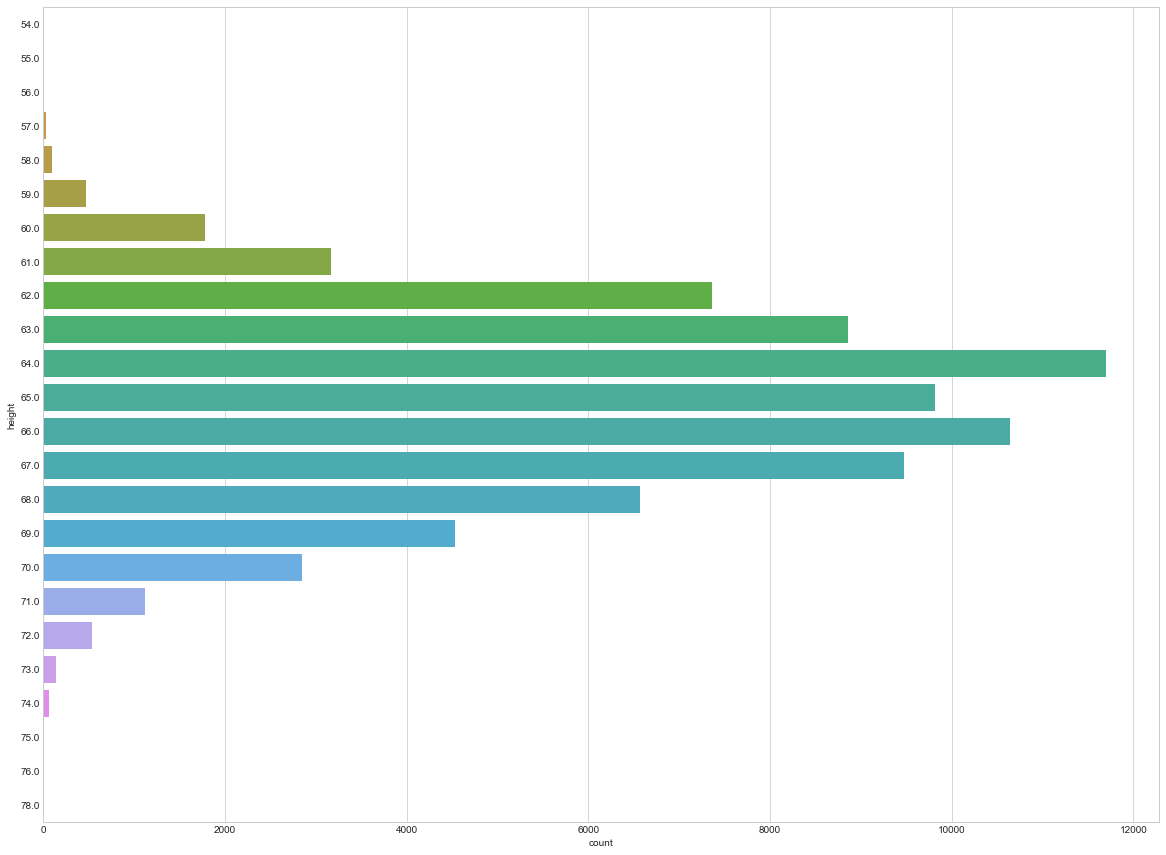

In [12]:
data_bin = pd.DataFrame()

data_bin['height'] = reviews['height']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (20, 15)) 
sns.countplot(y = "height", data = data_bin);

In [13]:
def three_sigma(Ser1):
    rule = (Ser1.mean()-3*Ser1.std()>Ser1) | (Ser1.mean()+3*Ser1.std()< Ser1)
    index = np.arange(Ser1.shape[0])[rule]
    outrange = Ser1.iloc[index]
    return outrange

data_anomaly_height = three_sigma(reviews['height'])
print("Count:", data_anomaly_height.count())
print("Min: ", data_anomaly_height.min())
print("Max: ", data_anomaly_height.max())
print("Anomalies:")
data_anomaly_height

Count: 146
Min:  54.0
Max:  78.0
Anomalies:


465       56.0
581       74.0
2859      56.0
3162      75.0
4704      56.0
4779      57.0
10132     57.0
10223     57.0
11859     54.0
12043     74.0
12590     74.0
14924     76.0
15477     75.0
16927     74.0
18059     57.0
18257     54.0
18945     74.0
19167     74.0
23345     74.0
23362     74.0
23524     76.0
23826     57.0
25364     74.0
25368     74.0
25648     74.0
25979     74.0
28117     75.0
28141     74.0
28224     57.0
30032     74.0
          ... 
115178    57.0
116545    56.0
117884    76.0
117967    74.0
119095    74.0
120092    74.0
120681    56.0
121531    74.0
123017    74.0
124386    56.0
125519    74.0
125915    75.0
126982    75.0
127222    74.0
127337    74.0
128741    54.0
129032    74.0
129797    74.0
130051    74.0
130398    75.0
132430    74.0
134020    74.0
139379    56.0
139598    74.0
140143    78.0
140295    74.0
141220    57.0
143416    57.0
145173    55.0
145779    75.0
Name: height, Length: 146, dtype: float64

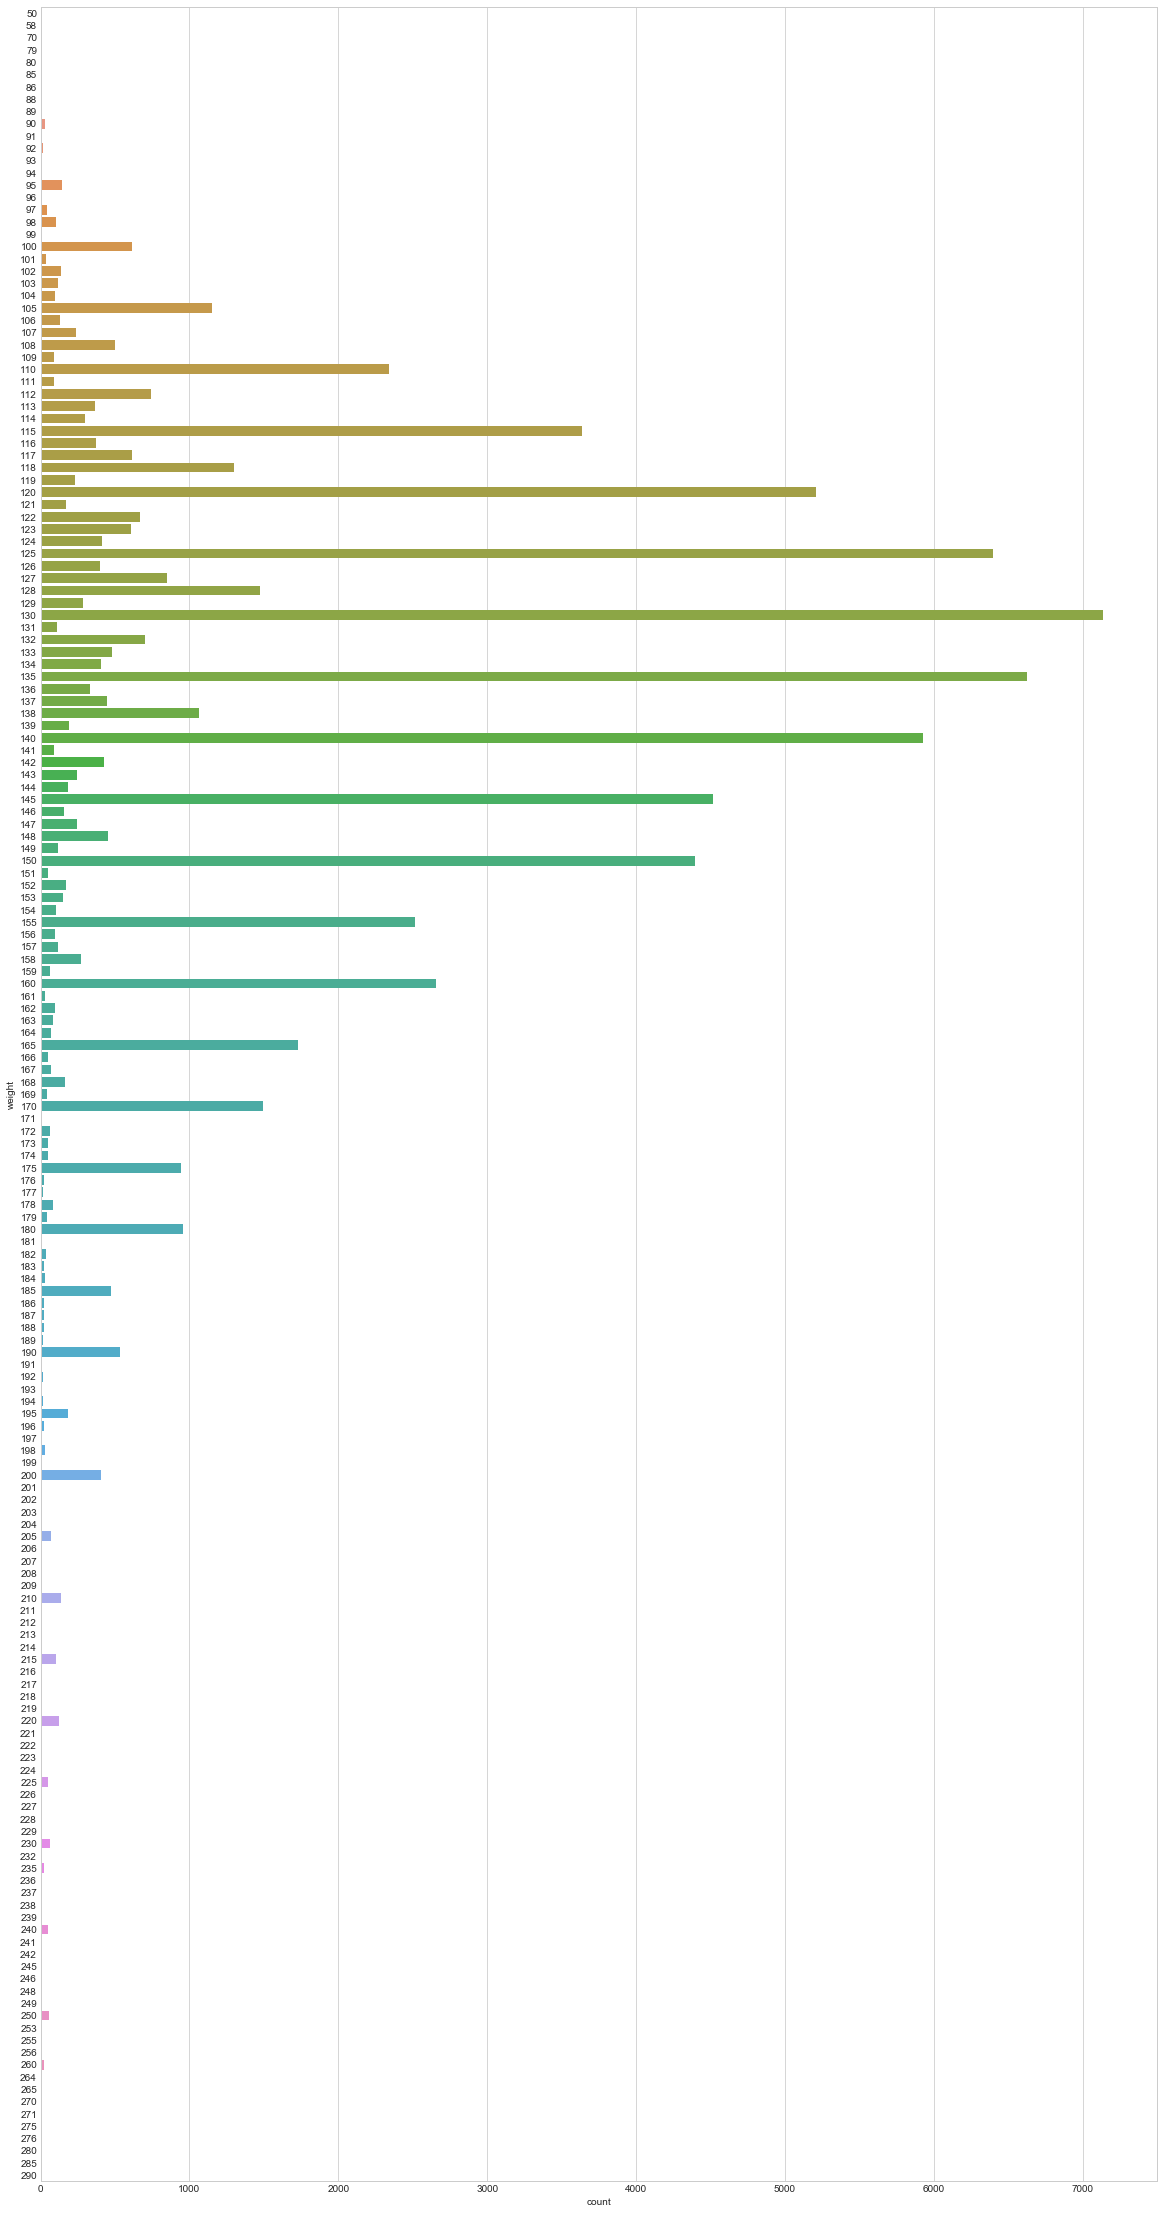

In [14]:
data_bin = pd.DataFrame()

data_bin['weight'] = reviews['weight']

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (20, 40)) 
sns.countplot(y = "weight", data = data_bin);

In [15]:
dfWeight = reviews.loc[reviews['weight'] % 5 == 0 ]

def three_sigmaWeight(Ser1):
    weight = reviews['weight']
    rule = (Ser1.mean()-3*Ser1.std()>Ser1) | (Ser1.mean()+3*Ser1.std()< Ser1)
    index = np.arange(weight.shape[0])[rule]
    outrange = weight.iloc[index]
    return outrange

data_anomaly_weight = three_sigma(dfWeight['weight'])
print("Count:", data_anomaly_weight.count())
print("Min: ", data_anomaly_weight.min())
print("Max: ", data_anomaly_weight.max())
print("Anomalies:")
data_anomaly_weight

Count: 749
Min:  50
Max:  290
Anomalies:


109       210
188       220
278       210
795       205
1062      225
1220      210
1289      215
1395      230
2114      215
2166      215
2299      215
2495      215
2565      255
2571      240
2848      210
2856      270
2903      230
3178      220
3188      215
3273      220
3523      250
4244      205
4446      210
4575      205
4797      215
5056      210
5128      235
5147      215
5379      205
5453      245
         ... 
140749    210
140970    240
141017    240
141357    245
141388    210
141476    230
141712    225
142251    215
142290    210
142310    220
142423    215
142565    215
143785    250
143894    210
144388    210
144470    215
144523    210
144571    230
144663    220
144748    220
145098    270
145218    215
145361    205
145486    210
145532    245
145566    215
145643    210
145703    210
146022    215
146304    220
Name: weight, Length: 749, dtype: int64

#### Conclusion:
- Since a univariate outlier is defined by an observation with a variable that has an unusual value, the naive Bayes rules was applied to detect the outliers.
- The rules are applied to "age", "height", and "weight", since the rest fo the feartures such as "fit", "size" are better to be interpreted with other other features together 
- 3σ Rules was applied first, which theoretically should rejects 0.3% of the data. However, the function is returning more data than it should for "age" and "weight", which could be a result of data set not normally distributed.
- Boxplot was also applied to find the anomalies, which can be cross referenced with the results from 3σ rule.

Original Dataset Description: 
                age
count  79250.000000
mean      33.534864
std        7.604671
min       14.000000
25%       29.000000
50%       32.000000
75%       36.000000
max       77.000000
Data set from observation Description: 
                age
count  79199.000000
mean      33.515347
std        7.551606
min       16.000000
25%       29.000000
50%       32.000000
75%       36.000000
max       69.000000
Data set from boxplot Description: 
                age
count  72142.000000
mean      31.804122
std        5.041768
min       18.000000
25%       29.000000
50%       31.000000
75%       35.000000
max       44.000000


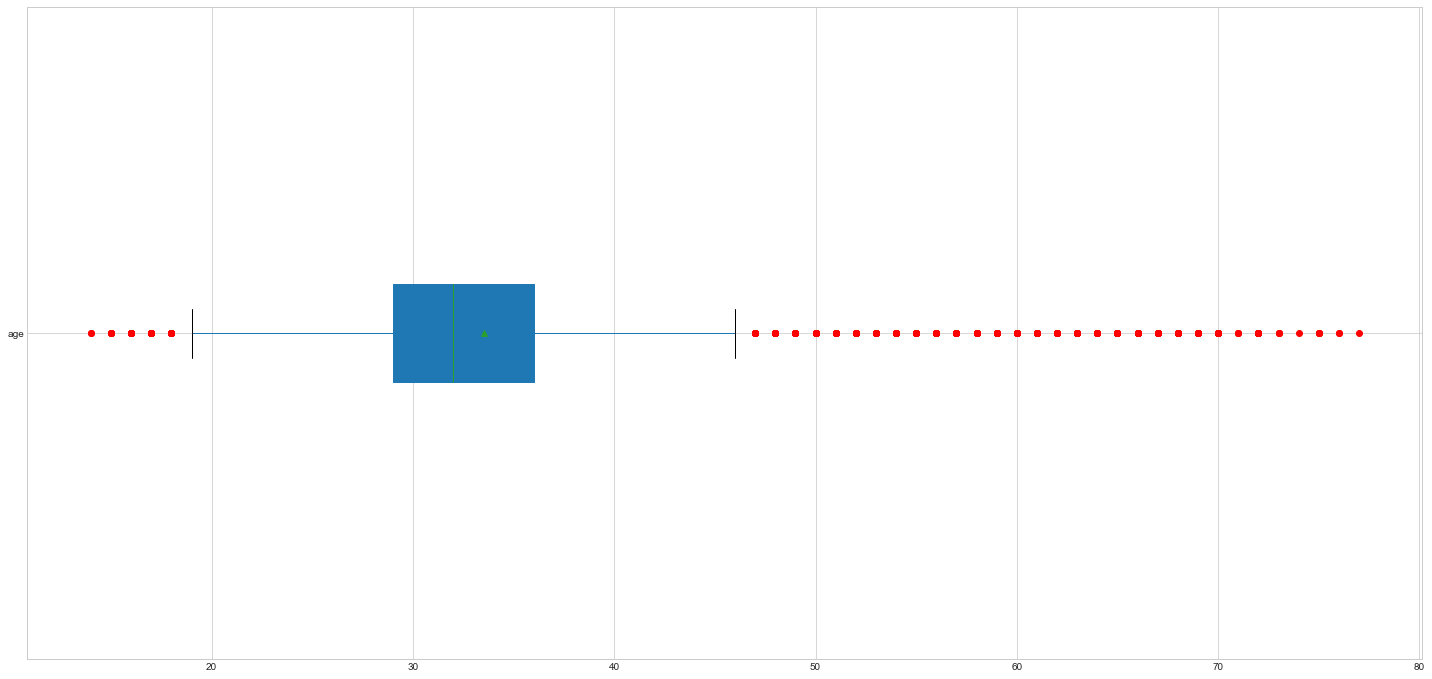

In [16]:
reviews_age = reviews[['age']]

statistics_origin = reviews_age.describe()
print("Original Dataset Description: ")
print(statistics_origin)

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (25, 12)) 
reviews_age.boxplot(sym='r',vert=False,patch_artist=True,meanline=False,showmeans=True)

reviews_o = reviews_age[(reviews['age'] > 15)&(reviews['age'] < 70)]
statistics = reviews_o.describe()
print("Data set from observation Description: ")
print(statistics)

reviews_b = reviews_age[(reviews['age'] > 17)&(reviews['age'] < 45)]
statistics = reviews_b.describe()
print("Data set from boxplot Description: ")
print(statistics)

Original Dataset Description: 
             height
count  79250.000000
mean      65.213767
std        2.672110
min       54.000000
25%       63.000000
50%       65.000000
75%       67.000000
max       78.000000
Data set from observation Description: 
             height
count  79205.000000
mean      65.214141
std        2.661640
min       57.000000
25%       63.000000
50%       65.000000
75%       67.000000
max       74.000000
Data set from boxplot Description: 
             height
count  79138.000000
mean      65.206702
std        2.650456
min       57.000000
25%       63.000000
50%       65.000000
75%       67.000000
max       73.000000


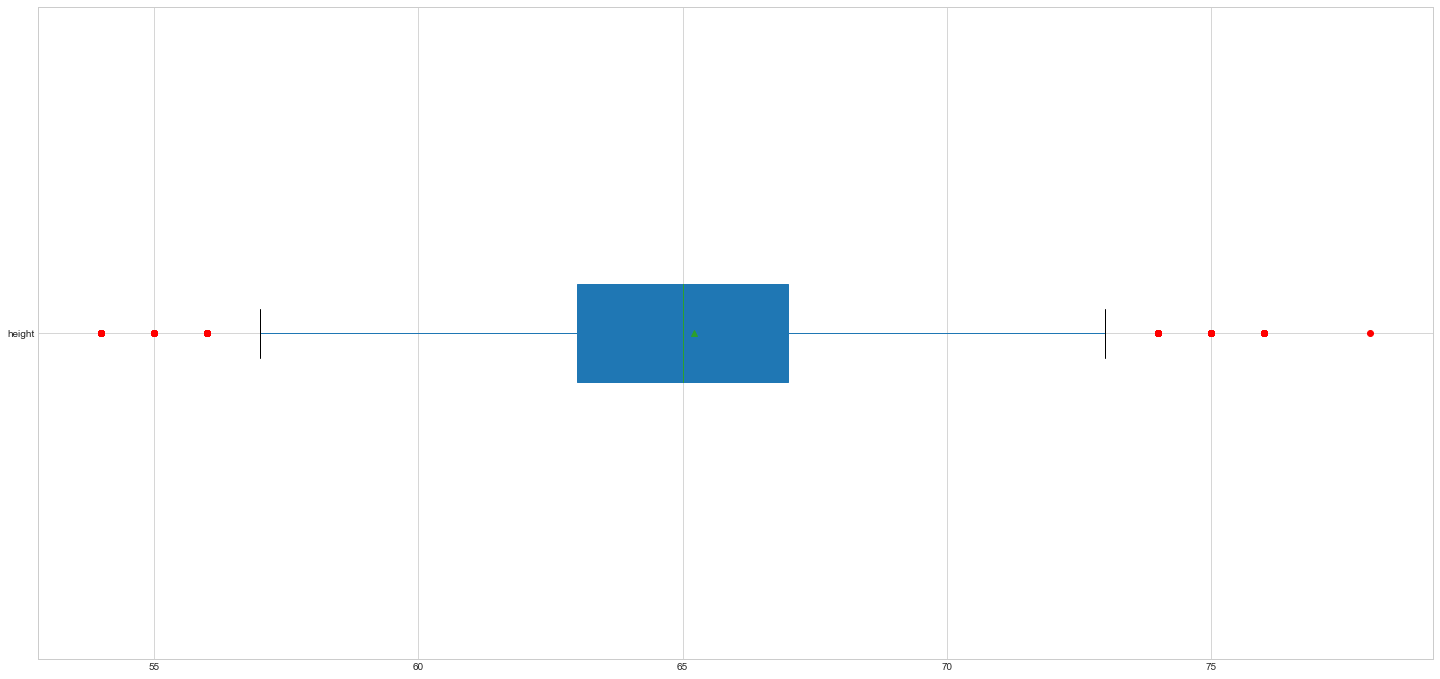

In [17]:
reviews_height = reviews[['height']]

statistics_origin = reviews_height.describe()
print("Original Dataset Description: ")
print(statistics_origin)

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (25, 12)) 
reviews_height.boxplot(sym='r',vert=False,patch_artist=True,meanline=False,showmeans=True)

reviews_o = reviews_height[(reviews['height'] > 56)&(reviews['height'] < 75)]
statistics = reviews_o.describe()
print("Data set from observation Description: ")
print(statistics)

reviews_b = reviews_height[(reviews['height'] > 56)&(reviews['height'] < 74)]
statistics = reviews_b.describe()
print("Data set from boxplot Description: ")
print(statistics)

Original Dataset Description: 
             weight
count  79250.000000
mean     137.021981
std       21.423956
min       50.000000
25%      123.000000
50%      135.000000
75%      148.000000
max      290.000000
Data set from observation Description: 
             weight
count  79058.000000
mean     136.893964
std       20.893520
min       95.000000
25%      123.000000
50%      135.000000
75%      148.000000
max      249.000000
Data set from boxplot Description: 
             weight
count  76548.000000
mean     134.726511
std       17.506702
min       86.000000
25%      122.000000
50%      133.000000
75%      145.000000
max      184.000000


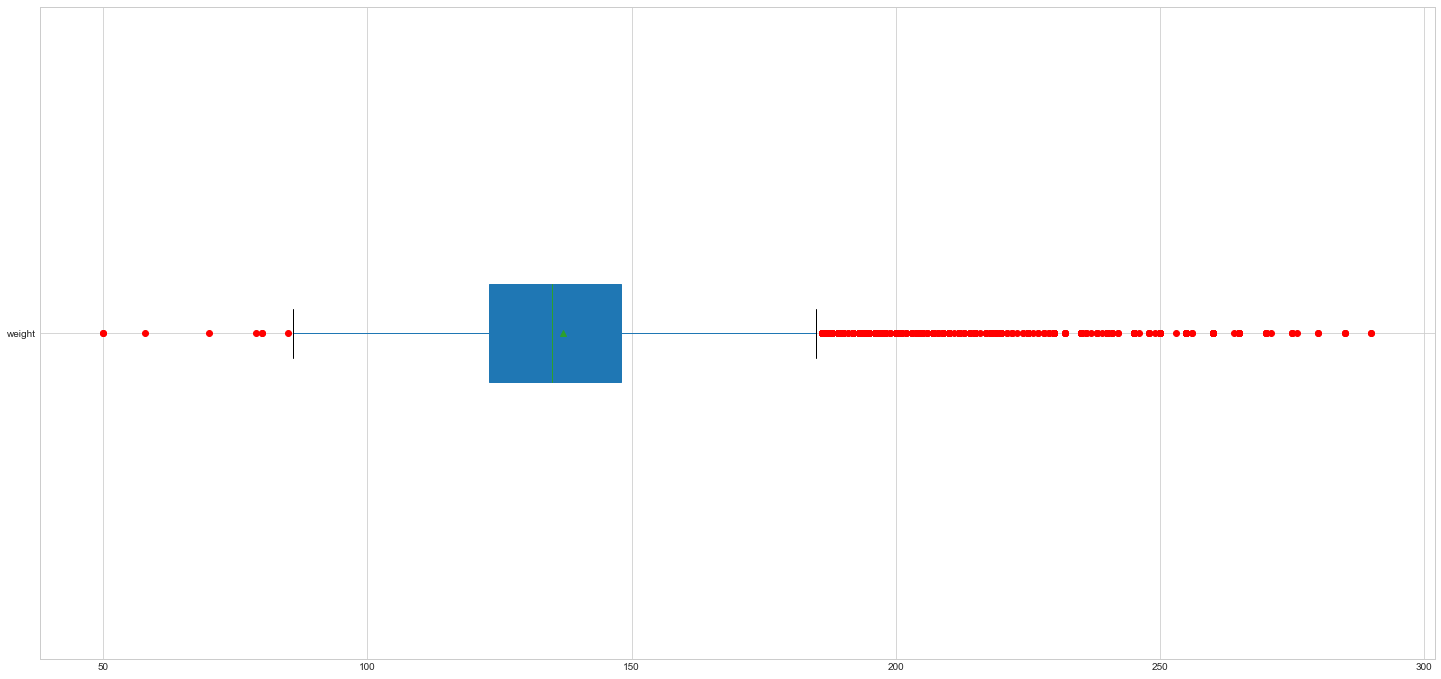

In [18]:
reviews_weight = reviews[['weight']]

statistics_origin = reviews_weight.describe()
print("Original Dataset Description: ")
print(statistics_origin)

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (25, 12)) 
reviews_weight.boxplot(sym='r',vert=False,patch_artist=True,meanline=False,showmeans=True)

reviews_o = reviews_weight[(reviews['weight'] > 94)&(reviews['weight'] < 250)]
statistics = reviews_o.describe()
print("Data set from observation Description: ")
print(statistics)

reviews_b = reviews_weight[(reviews['weight'] > 85)&(reviews['weight'] < 185)]
statistics = reviews_b.describe()
print("Data set from boxplot Description: ")
print(statistics)

#### Conclusion
- Applying boxplot would reject more data points than the 3σ rule would do. 
- Boxplot is highly symmetric for the graph of "height", which once again could be the result of "height" being normally distributed.
- There are two ways to interpret the data: 
    - The first one could be catagorized as "fake data", which could tell by obsserving the dataset.This type of data is semantically meaningless. Data points such as age of 0 and age of 117 falls into this catagory.
    - The second one could be catagorized as "scarce data". They happen at a less frequency when compared to other data and is thus rejected by the algorithms. This type of data is less helpful when applying machine learning. Data points such as height of 78 inch and 54 inch would fall into this category.
- It leaves up to the data interpreter to decide how they want to look at the data
    

### Ⅱ. Multivariate
- Algorithm applied: Isolation forest

In [19]:
from sklearn.ensemble import IsolationForest

In [20]:
rng = np.random.RandomState(42)
ilf = IsolationForest(n_estimators = 100,
                      max_samples = 256,
                      behaviour = "new",
                      random_state = rng,
                      contamination = 0.0003
                      
    )
X_cols = ["category","rented_for"]
ilf.fit(reviews[X_cols])
pred = ilf.predict(reviews[X_cols])
 
data_pred = reviews
data_pred["pred"] = pred

data_pred.loc[data_pred["pred"] == -1]

,age,body_type,category,fit,height,item_id,rating,rented_for,review_date,size,user_id,weight,bust_volume,bust_height,pred
496,28,3,49,large,65.0,2337876,10,0,2016-01-05,12,502927,170,710,4,-1
12190,30,3,52,fit,68.0,2565135,8,0,2015-03-04,8,813562,125,390,3,-1
26603,31,1,52,fit,69.0,2565135,10,0,2014-07-02,8,863502,128,480,2,-1
30730,36,1,52,fit,69.0,2565135,8,0,2015-03-25,8,451377,133,590,4,-1
42267,46,1,42,large,71.0,545632,8,0,2014-05-01,8,467479,125,390,1,-1
43187,36,4,42,fit,68.0,545632,8,0,2016-06-07,14,760444,145,390,2,-1
43516,35,1,52,small,64.0,2565135,8,0,2014-11-05,4,562734,123,390,3,-1
45820,52,1,42,fit,66.0,545632,10,0,2015-04-20,4,743979,120,480,3,-1
51042,36,4,49,fit,61.0,2337876,10,8,2016-01-14,1,212562,120,310,2,-1
53691,44,3,52,fit,61.0,2565135,8,0,2015-03-22,4,711580,105,310,1,-1


In [21]:
X_cols = ["height","weight","size"]
ilf.fit(reviews[X_cols])
pred = ilf.predict(reviews[X_cols])
 
data_pred = reviews
data_pred["pred"] = pred

data_pred.loc[data_pred["pred"] == -1]

,age,body_type,category,fit,height,item_id,rating,rented_for,review_date,size,user_id,weight,bust_volume,bust_height,pred
19218,31,3,16,small,70.0,136110,10,3,2014-05-18,57,322795,260,710,3,-1
24910,39,4,16,large,70.0,1542250,10,3,2015-03-10,57,52166,260,1000,3,-1
27610,39,4,45,fit,70.0,144727,6,4,2016-02-08,51,52166,260,1000,3,-1
32043,40,0,45,large,60.0,144727,8,2,2014-05-10,51,799988,237,850,4,-1
37011,33,4,20,fit,72.0,142179,10,7,2017-03-27,44,482373,248,850,4,-1
38855,50,3,16,fit,70.0,865225,10,2,2015-10-08,51,108088,240,850,4,-1
40886,45,3,20,fit,70.0,1446293,10,0,2017-08-25,51,489853,290,850,4,-1
53400,25,0,16,fit,71.0,1920477,8,2,2015-04-09,51,596569,250,710,4,-1
62984,28,0,16,fit,60.0,467817,8,7,2017-09-05,51,383515,250,1180,6,-1
67344,39,4,16,small,70.0,135459,8,4,2013-10-26,51,52166,260,1000,3,-1


In [22]:
X_cols = ["bust_volume","bust_height","size"]
ilf.fit(reviews[X_cols])
pred = ilf.predict(reviews[X_cols])
 
data_pred = reviews
data_pred["pred"] = pred

data_pred.loc[data_pred["pred"] == -1]

,age,body_type,category,fit,height,item_id,rating,rented_for,review_date,size,user_id,weight,bust_volume,bust_height,pred
2856,28,2,20,fit,64.0,1241304,10,3,2017-06-08,51,193803,270,1370,6,-1
8531,39,3,20,fit,65.0,1501987,10,2,2017-11-21,57,585229,280,1810,6,-1
17239,33,0,20,fit,64.0,1446293,8,7,2016-04-23,51,931022,220,1580,6,-1
25807,38,3,45,large,64.0,144727,10,7,2016-09-25,39,387255,215,1810,10,-1
27063,49,2,20,fit,69.0,834814,8,2,2017-05-04,40,140752,220,1810,8,-1
40174,28,2,16,fit,67.0,130259,10,4,2017-11-27,45,832890,240,1580,8,-1
44062,33,3,20,fit,66.0,834814,10,4,2017-12-21,51,190475,250,1580,8,-1
46874,35,3,20,fit,68.0,125465,10,2,2014-10-03,51,199631,207,1810,7,-1
53401,36,2,16,small,65.0,1515649,8,4,2018-01-02,54,543250,265,1810,6,-1
59561,40,3,20,small,63.0,1240309,10,7,2017-01-06,51,200920,220,1370,6,-1


In [23]:
X_cols = ["weight", "size", 'height', 'bust_volume', 'bust_height']
ilf = IsolationForest(n_estimators = 100,
                      max_samples = 256,
                      behaviour = "new",
                      random_state = rng,
                      contamination = 0.05
                      
    )
item_id = 126335
largest_item = reviews.loc[reviews['item_id'] == item_id]
fit_data = largest_item.loc[largest_item['fit'] == 'fit']
pred = ilf.fit_predict(fit_data[X_cols])
 
data_pred = fit_data
data_pred["pred"] = pred

size_28 = data_pred.loc[data_pred['size'] == 28]
size_28.loc[size_28["pred"] == -1]

/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,age,body_type,category,fit,height,item_id,rating,rented_for,review_date,size,user_id,weight,bust_volume,bust_height,pred
19424,34,2,16,fit,67.0,126335,8,4,2014-10-14,28,984453,212,1370,7,-1
28434,34,0,16,fit,65.0,126335,8,6,2013-05-18,28,514596,200,1370,8,-1
73871,25,3,16,fit,69.0,126335,10,2,2014-11-17,28,508828,200,1000,7,-1
77061,31,3,16,fit,72.0,126335,10,2,2014-08-18,28,29751,209,590,2,-1
122502,25,0,16,fit,71.0,126335,10,4,2014-05-02,28,596569,250,710,4,-1


In [24]:
def convertAnomaly(s):
    if s == 1:
        return "Good"
    return "Anomaly"

size_28['pred'] = size_28.pred.apply(convertAnomaly)
size_28.head()

/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,age,body_type,category,fit,height,item_id,rating,rented_for,review_date,size,user_id,weight,bust_volume,bust_height,pred
1791,33,5,16,fit,63.0,126335,8,7,2014-09-14,28,30937,185,710,3,Good
4611,35,0,16,fit,67.0,126335,8,6,2012-10-16,28,64706,190,710,3,Good
8417,34,3,16,fit,60.0,126335,10,3,2017-06-11,28,598450,175,710,6,Good
9381,45,3,16,fit,69.0,126335,10,6,2014-05-19,28,362635,195,480,3,Good
11231,39,4,16,fit,60.0,126335,8,2,2012-09-06,28,148459,180,850,4,Good


In [25]:
size_28.sort_values(['weight']).head(20)

,age,body_type,category,fit,height,item_id,rating,rented_for,review_date,size,user_id,weight,bust_volume,bust_height,pred
50848,46,3,16,fit,68.0,126335,10,7,2014-11-21,28,780135,123,590,4,Good
11870,36,4,16,fit,63.0,126335,8,7,2014-05-08,28,812257,138,390,2,Good
76337,26,3,16,fit,68.0,126335,10,2,2014-12-15,28,894230,140,590,4,Good
48421,62,0,16,fit,66.0,126335,8,2,2016-04-22,28,63419,150,850,4,Good
122473,49,3,16,fit,67.0,126335,10,4,2012-12-16,28,770657,155,710,3,Good
77925,30,4,16,fit,65.0,126335,10,7,2014-07-28,28,348374,155,590,3,Good
83236,30,4,16,fit,69.0,126335,10,7,2016-06-01,28,144763,160,710,4,Good
131187,29,4,16,fit,67.0,126335,8,7,2014-08-04,28,814048,160,590,4,Good
102788,62,2,16,fit,61.0,126335,8,4,2014-09-08,28,524404,162,710,4,Good
18963,33,2,16,fit,69.0,126335,10,4,2014-11-12,28,936262,165,850,5,Good


In [26]:
X_cols.remove('size')

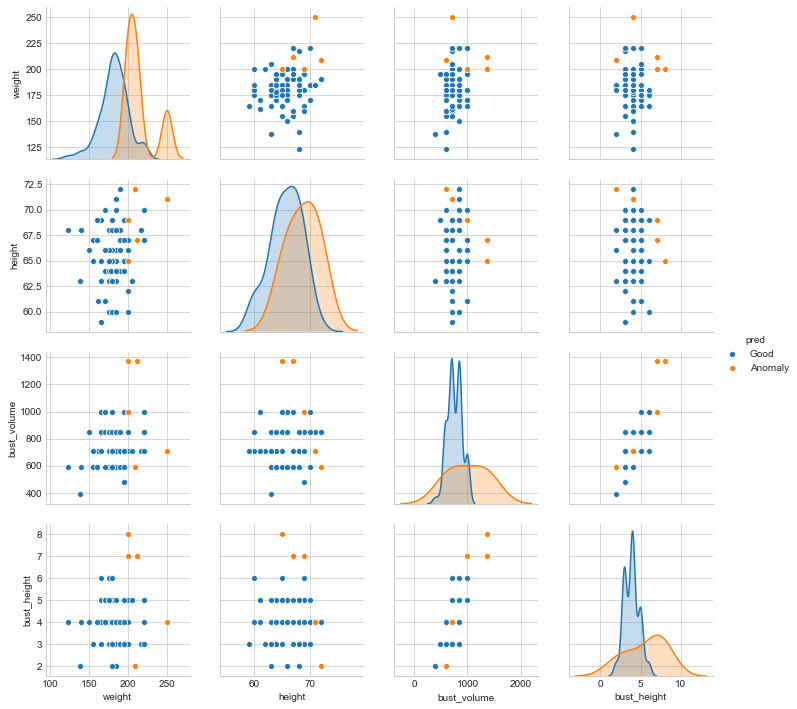

In [27]:
sns.pairplot(size_28, hue='pred', vars=X_cols)

In [28]:
# from sklearn import preprocessing
# le_category = preprocessing.LabelEncoder()
# reviews['fit']  = le_category.fit_transform(reviews['fit'])
# le_category_mapping = dict(zip(le_category.classes_, le_category.transform(le_category.classes_)))
# category_encoding = pd.DataFrame.from_dict(le_category_mapping, orient='index').rename(columns={0: 'encoding'})
# category_encoding.index.name = 'labels'
# category_encoding.head()

In [29]:
# X_cols = ["fit", "weight", "size"]
# ilf.fit(reviews[X_cols])
# pred = ilf.predict(reviews[X_cols])
 
# data_pred = reviews
# data_pred["pred"] = pred

# data_pred.loc[data_pred["pred"] == -1]

#### Conclusion
- The contamination I picked is 0.003, which rejects about 0.3% of the data.
- Considering the rationale behind the Isolation Forest, the data it produced would fall into "scarce data". In this case, since the rejection rate is low, only the data that happen at very loe frequency would be rejected. 
- For example, the conbination of a person that weighs 250 lbs and ordered a size 51 dress would be rejected. 
- It is hard to tell that the data is rejected because the low frequency of a person weighing 250 lbs or the person weighing 250 lbs should have ordered a different size, considering the isolation forest will reject anything that happens less frequently.

In [30]:

itemSet = set(reviews.item_id)
print(len(itemSet))

603


In [31]:
X_cols = ["weight", "size", 'height', 'bust_volume', 'bust_height']
anomalies = pd.DataFrame()
for fit in ['fit', 'small', 'large']:
    fit_data = reviews.loc[reviews['fit'] == fit]
    count = 0

    for item in itemSet:
        isolation_forest = IsolationForest(n_estimators = 100,
                          behaviour = "new",
                          random_state = rng,
                          contamination = 0.05

        )
        product_reviews = fit_data.loc[fit_data['item_id'] == item]
        if len(product_reviews) == 0:
            continue
        print(item)
        #print(product_reviews[X_cols].head())
        pred = isolation_forest.fit_predict(product_reviews[X_cols])
        df_pred = pd.DataFrame(pred)
        df_pred.index = product_reviews.index
        anomalies = pd.concat([anomalies, df_pred])
        count = count + 1
        print(count)
    
reviews['Anomaly'] = anomalies
    
# X_cols = ["weight", "size", 'height', 'bust_volume', 'bust_height']
# ilf = IsolationForest(n_estimators = 100,
#                       max_samples = 256,
#                       behaviour = "new",
#                       random_state = rng,
#                       contamination = 0.1
                      
#     )
# item_id = 126335
# largest_item = reviews.loc[reviews['item_id'] == item_id]
# fit_data = largest_item.loc[largest_item['fit'] == 'fit']
# pred = ilf.fit_predict(fit_data[X_cols])
 
# data_pred = fit_data
# data_pred["pred"] = pred

# size_28 = data_pred.loc[data_pred['size'] == 28]
# size_28.loc[size_28["pred"] == -1]

466944
1
866304
2
272388
3
1447941
4
174086
5
145417
6
1529884
7
921642
8
864299
9
1882156
10
131117
11
524341
12
184374
13
555063
14
1800249
15
450618
16
682043
17
188485
18
168012
19
2586703
20
1366101
21
1808470
22
155735
23
815195
24
241759
25
585830
26
127081
27
1542250
28
1110122
29
561264
30
1831026
31
1869940
32
166006
33
233596
34
753788
35
1515649
36
833666
37
2340996
38
1695878
39
147594
40
432268
41
432275
42
467091
43
149655
44
258206
45
1142945
46
503972
47
2531493
48
1433766
49
618661
50
1523882
51
155820
52
174258
53
1913010
54
1009845
55
1106101
56
2064568
57
159931
58
1259708
59
858304
60
694477
61
1851598
62
164051
63
1962198
64
1241304
65
657626
66
1603811
67
1312996
68
1745124
69
1880294
70
1769705
71
616682
72
149739
73
141548
74
862446
75
1800440
76
196859
77
1493246
78
1763585
79
1278211
80
268562
81
729362
82
276763
83
1163553
84
1251617
85
135459
86
1630499
87
1427750
88
555308
89
1255726
90
182578
91
174391
92
1005880
93
1384766
94
737598
95
1896772
96
137863

/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/sit

45
1142945
46
503972
47
2531493
48
1433766
49
618661
50
1523882
51
155820


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


52
174258
53
1913010
54
1009845
55
1106101
56
2064568
57
159931
58
1259708
59
858304
60
694477
61
1851598
62
164051
63
1962198
64
1241304
65
657626
66
1312996
67
1745124
68
1880294
69
1769705


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


70
616682
71
149739
72
141548
73
862446
74
1800440
75
196859
76
1493246
77
1763585
78
1278211
79
268562
80
729362
81
276763
82
1163553
83
1251617


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


84
135459
85
1630499
86
555308
87
1255726
88
182578
89
174391
90
1005880
91
1384766
92
737598
93
1896772
94
1378631
95
158028
96
452942
97
2793818
98
1175903
99
1335648
100
178527


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


101
946530
102
176490
103
137585
104
1698166
105
141688
106
1796472


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


107
1460606
108
1845636
109
227716
110
1849737
111
987536
112
154002
113
405907
114
1446293
115
889239
116
1749401
117
149913
118
985499
119
999837
120
1530271
121
655775
122
1188264
123
1083818
124
987569


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/sit

125
1982904
126
1700282


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


127
141761
128
1567172
129
131533
130
133584
131
1769937
132
416213
133
1638869
134
903647
135
1939936
136
387552
137
233953
138
1126889
139
227818
140
123373
141
125424
142
1817073
143
145906
144
1645046
145
721403
146
932347
147
330238
148
2783742
149
389631
150
1266176
151
522755
152
195076
153
127495
154
1640972
155
721424
156
139792
157
1090064
158
125465
159
254493
160
2720289
161
1968677
162
1714731
163
2937389
164
918064
165
1880626
166
197170
167
195124
168
617013
169
199231
170
1212992
171
135750
172
1522253
173
2396750
174
1325648
175
240208
176
1172052
177
2155094
178
160346


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


179
987743
180
180843
181
1882731
182
131698


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


183
668280
184
148089
185
150138
186
151551
187
125564
188
686720
189
1675905
190
182915
191
531077
192
1268360
193
168592
194
1991314
195
619157
196
1010328
197
193179
198
2529948
199
887454
200
234144


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


201
1362593
202
168610


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


203
1090219
204
1956527
205
1737394
206
144051
207
795320
208
1731270
209
305868
210
858828
211
1729232
212
864981
213
914136
214
1872602
215
637670
216
166633
217
1655531
218
164593
219
1630965
220
334588
221
1749759
222
197391
223
1415952
224
1626903
225
1563416
226
187164
227
1940255
228
199457
229
1188641


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


230
1174307
231
686884
232
1501987
233
1671970
234
129831
235
1215281
236
1241917
237
1661761
238
1295171
239
2261828
240
162634
241
1108814
242
1000270
243
1063761
244
547674
245
185182
246
545632
247
1309537
248
2063202
249
142179
250
160612
251
467817
252
2743152
253
172914
254
127865
255
746366
256
134015
257
1057664
258
1584000
259
185226
260
1860491
261
123793
262
1528722
263
1788819
264
963476
265
2366355
266
730008
267
183194
268
652189
269
183200
270
1608617
271
1229740
272
136110
273
179124
274
1016759
275
1076157
276
152510
277
156607
278
693185
279
865225
280
883661
281
607186
282
1313746
283
1317846
284
1729496
285
1018841
286
2579422
287
703458


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


288
1565667
289
2829293
290
254960
291
1213427
292
1954806
293
2653183
294
424962
295
1821702
296
1082379
297
1534987
298
562188
299
1625102
300
2565135
301
1082384
302
2098200
303
154652
304
140321
305
132135
306
1223725
307
627759
308
756784
309
468020
310
345146
311
834620
312
1207360


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


313
1424454
314
443464
315
1274956
316
988239
317
203856
318
1408079
319
756819
320
1764436
321
2337876
322
152662
323
187477
324
1881176
325
1858651
326
1113191
327
1662059
328
1186923
329
832622
330
554095
331
1260666
332
429191
333
943243
334
916639
335
1207456
336
365727
337
1379493
338
1805488
339
1871026


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


340
173235
341
1905844
342
1897655
343
1260731
344
138431
345
1979590
346
154823
347
167112
348
144585
349
709832
350
877767
351
1875147
352
181453
353
2673874
354
130259
355
148690
356
986324
357
1498329
358
615644
359
150752
360
304354
361
1010926


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


362
1621234
363
683251
364
177394
365
1240309
366
1463543
367
890105
368
134393
369
2620667


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


370
146684
371
834814


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


372
1869056
373
152836
374
1076484
375
1692935
376
1746190
377
1031440
378
961819
379
1770781
380
417055
381
204063


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/sit

382
1000739
383
617766
384
1516843
385
124204
386
1484078
387
865585
388
1463604
389
2530612
390
1787191
391
1213752
392
1989948
393
1889597
394
597314
395
2673990
396
838983
397
644425
398
144714
399
1615177
400
902478
401
1133906


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


402
1459539
403
247125
404
1826136
405
1961311
406
724319
407
1793377
408
920927
409
1744232
410
1308013
411
638318


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


412
1596783
413
241019
414
126335
415
451969
416
175496
417
757135
418
763288
419
2004376


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


420
1093026
421
152998
422
1146287
423
1697200
424
2444721
425
550322
426
1709498
427
1549763
428
1334728
429
185800
430
1064397
431
1164757
432
1730006
433
1920477
434
1859039
435
1420770
436
1459683
437
181737
438
218606
439
175600
440
1598962
441
1940985
442
499195
443
2752000
444
781825
445
163328
446
527885
447
263699
448
1429022


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


449
2696735
450
1545760
451
538143
452
144931
453
1676837
454
1678888
455
374312
456
1687082
457
1695279
458
1226293
459
1674806
460
1209909
461
1750582
462
849468
463
904766
464
480832
465
1003076
466
140877
467
265806
468
1166927
469
187984
470
200269
471
2463317
472
693849
473
982621
474
403038
475
1484383
476
396894
477
1928796
478
1449570
479
1453669
480
2758251
481
224876
482
1048184
483
1050242
484
132738
485
1390212
486
194182
487
1730182
488
714374
489
1967750
490
124553
491
183945
492
1179273
493
1566348
494
1754771
495
188052
496
136860
497
1001122
498
159395
499
937638
500
532135
501
130727
502
755371
503
1980086
504
2916025
505
550590
506
134849
507
1547971
508
200393
509
1949394
510
945880
511
288472
512
128730


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


513
253667
514
1842923
515
859889
516
155381
517
143094
518
1273589
519
1459957
520
1726201
521
1339136
522
1404676


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


523
161541
524
1359622


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


525
2850568
526
624407
527
1496861
528
948002
529
870184
530
1220393
531
479018
532
1109803
533
1773356
534
263981
535
1996590
536
180014


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


537
1738544
538
241461
539
1058632
540
1419083
541
1187659
542
1515339
543
139086
544
1636171
545
1210197


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


546
472922
547
362332
548
325470
549
1355618
550
1662825
551
1337205
552
1210233
553
323450
554
153475
555
1390469
556
2303880
557
1009546
558
178058
559
1812370
560
806803


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/sit

561
982932
562
1238932
563
931734
564
176025
565
1832871
566
987052
567
1437612


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


568
1693615
569
1064880
570
1992625
571
1505204
572
1294261
573
128959
574
1832896
575
1869763
576
149459
577
1806296
578
925665
579
716777
580
169961
581
147440
582
255986
583
141300
584
284665
585
172027
586
985087
587
466944
1
866304
2
272388
3
1447941
4
174086


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


5
145417
6
1529884


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/sit

7
921642
8
1882156
9
131117
10
524341
11
184374
12
555063


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


13
1800249
14
450618
15
682043
16
188485
17
168012
18
2586703
19
1366101
20
1808470
21
155735
22
241759
23
585830
24
127081
25
1542250
26
1110122
27
561264
28
1831026
29
1869940
30
166006
31
233596
32
753788
33
1515649
34
833666
35
2340996
36
147594
37
432268
38
432275
39
467091
40
149655
41
258206
42
1142945
43
503972
44
2531493
45
1433766
46
618661
47
1523882
48
155820
49
174258
50
1913010
51
1009845
52
1106101
53
2064568
54
159931
55
1259708
56
858304
57
694477


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/sit

58
1851598
59
164051
60
1962198
61
1241304
62
657626
63
1603811
64
1312996


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


65
1745124
66
1880294
67
1769705
68
616682
69
149739
70
141548
71
862446
72
1800440
73
196859
74
1493246
75
1278211


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


76
268562
77
276763
78
1163553
79
1251617
80
135459
81
1630499
82
1427750
83
1255726
84
182578


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


85
174391
86
1005880
87
1384766
88
1378631
89
158028
90
452942
91
1175903


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


92
1335648
93
178527
94
946530
95
176490
96
137585
97
1698166
98
141688
99
1796472
100
1460606


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


101
1845636
102
227716
103
1849737
104
987536
105
154002
106
405907


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


107
1446293
108
889239


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


109
1749401
110
149913
111
985499
112
1530271


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


113
655775
114
1188264
115
1083818
116
987569
117
1982904
118
1700282
119
141761
120
1567172
121
131533
122
133584


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


123
1769937
124
416213


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


125
1638869
126
903647
127
1939936


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


128
387552
129
1126889


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


130
227818
131
123373
132
125424
133
1817073
134
145906
135
1645046
136
721403
137
932347
138
2783742
139
389631
140
1266176
141
195076
142
127495
143
1640972
144
721424
145
139792
146
1090064
147
125465
148
254493
149
1968677
150
2937389
151
918064


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


152
1880626
153
197170
154
195124
155
617013
156
199231
157
1212992
158
135750
159
1522253
160
2396750
161
1325648
162
240208
163
1172052
164
2155094


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


165
160346
166
987743
167
180843
168
1882731
169
131698
170
668280
171
148089
172
150138
173
151551
174
125564
175
686720
176
1675905
177
531077
178
1268360


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


179
168592
180
1991314
181
1010328
182
193179
183
2529948
184
887454
185
234144


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


186
1362593
187
168610
188
1090219
189
1366699
190
1956527


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


191
1737394
192
144051
193
795320
194
1731270
195
305868
196
858828
197
1729232
198
864981
199
914136
200
1872602
201
637670


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


202
166633
203
1655531
204
164593
205
1630965
206
334588
207
871172
208
197391
209
1626903
210
187164
211
1940255
212
199457
213
1188641
214
1174307
215
1501987
216
1671970


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


217
129831
218
344877
219
1215281
220
1241917
221
1661761
222
2261828
223
162634
224
1108814
225
1000270


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


226
193361
227
1063761
228
547674
229
185182
230
545632
231
1309537
232
2063202
233
142179
234
160612
235
467817
236
2743152
237
172914
238
269172
239
127865
240
746366
241
134015
242
1057664


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


243
1584000
244
185226
245
1860491
246
123793
247
1528722
248
1788819
249
963476


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


250
2366355
251
730008
252
183194
253
652189
254
183200
255
1608617
256
1229740
257
136110
258
1147823
259
179124
260
1016759
261
1076157
262
152510
263
156607
264
693185
265
865225
266
883661
267
607186
268
1729496
269
1018841
270
2579422
271
703458
272
1565667
273
2829293
274
254960
275
1213427
276
1954806
277
2653183
278
424962
279
1821702


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


280
1082379
281
1534987
282
562188
283
1625102
284
2565135
285
1082384
286
2098200
287
154652
288
140321
289
132135
290
1223725
291
627759
292
756784
293
468020
294
902200
295
834620
296
1207360
297
443464
298
1274956
299
988239
300
203856
301
756819


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


302
1764436
303
2337876
304
152662


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


305
187477
306
1858651
307
1113191
308
1186923
309
832622
310
1260666
311
429191
312
943243
313
1313942
314
916639


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


315
1207456
316
365727
317
1805488
318
1871026


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


319
1905844
320
1260731
321
138431
322
1979590
323
154823
324
167112
325
144585
326
709832


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


327
877767
328
1875147


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/sit

329
181453
330
2673874
331
130259
332
148690
333
1498329
334
169179
335
615644
336
150752
337
304354


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


338
1010926
339
1621234
340
683251
341
177394
342
1240309
343
1463543
344
890105
345
134393


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


346
2620667
347
146684
348
834814
349
152836
350
1076484
351
1692935
352
1746190
353
1031440


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


354
961819
355
1770781
356
417055
357
204063
358
617766
359
1516843
360
124204
361
1484078
362
865585
363
2530612
364
1787191
365
1213752
366
1989948
367
1889597


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


368
597314
369
2673990
370
838983


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


371
644425
372
144714
373
1615177
374
902478
375
1133906
376
1459539
377
247125
378
144727
379
1826136
380
724319
381
1793377
382
1744232
383
1308013


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


384
638318
385
1596783
386
241019
387
126335


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


388
451969
389
175496
390
757135


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


391
763288
392
2004376
393
152998
394
1146287
395
1697200
396
2444721
397
550322
398
1709498
399
1549763
400
1334728


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/sit

401
185800
402
1064397
403
2553295
404
1164757
405
1730006
406
1920477
407
1859039
408
1420770
409
1459683
410
181737
411
218606
412
175600
413
499195
414
2752000
415
781825


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/sit

416
163328
417
527885
418
263699
419
1429022
420
2696735
421
538143
422
1676837
423
1678888
424
374312


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


425
1687082
426
1695279
427
1226293
428
1674806


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


429
1209909
430
1750582
431
849468
432
904766
433
1003076
434
140877
435
265806
436
1166927
437
187984
438
194128
439
200269
440
2463317
441
693849
442
165468
443
982621
444
403038


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


445
1484383
446
396894
447
1928796
448
1449570
449
1453669
450
2758251
451
224876
452
1048184
453
1050242
454
132738
455
194182
456
1730182


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


457
714374
458
1967750
459
124553
460
183945
461
1179273
462
1566348
463
1754771
464
188052
465
136860
466
159395
467
937638
468
532135
469
130727
470
755371
471
2916025
472
550590
473
134849
474
1547971
475
200393
476
1949394
477
945880
478
288472


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


479
128730
480
253667
481
1842923
482
155381
483
143094
484
1273589
485
1726201


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


486
1339136
487
161541
488
1359622
489
2850568
490
1224461
491
624407
492
1496861
493
948002
494
870184
495
1220393
496
1109803
497
1773356
498
1996590
499
180014


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


500
1738544
501
241461
502
1419083
503
1187659


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


504
1515339
505
139086
506
1636171
507
1210197
508
472922
509
362332
510
1355618
511
1662825


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


512
1337205
513
1210233
514
323450
515
153475


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


516
2303880
517
1009546
518
178058
519
806803
520
982932
521
1238932
522
931734
523
176025


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/sit

524
1832871
525
987052
526
1437612
527
1693615
528
1064880
529
1992625
530
1505204
531
1294261
532
128959
533
1832896
534
1869763
535
149459
536
1806296


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


537
925665
538
716777
539
147440


/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/michael.svoren/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:480: RuntimeWarning: invalid value encountered in true_divide
  * _average_path_length([self.max_samples_]))


540
141300
541
284665
542
172027
543


In [38]:
copy = reviews.copy()
print(reviews.head())
copy['Anomaly'] =copy['Anomaly'].apply(lambda x: False if x==1 else True)
print(len(copy))
copy= copy[copy['Anomaly'] == False]
print(len(copy))

copy = copy.drop(columns=['Anomaly'])

   age  body_type  category  fit  height  item_id  rating  rented_for  \
1   36          6        20  fit    66.0   153475      10           3   
2   34          4        16  fit    65.0   126335       8           2   
3   27          1        20  fit    69.0   616682      10           7   
6   65          2        16  fit    63.0   130259      10           2   
7   33          5        20  fit    63.0  1729232      10           2   

  review_date  size  user_id  weight  bust_volume  bust_height  pred  Anomaly  
1  2013-06-18    12   273551     132          390            2     1        1  
2  2014-02-12     8   909926     135          480            3     1        1  
3  2016-09-26    12   151944     145          390            2     1        1  
6  2013-01-01     8    86661     118          710            5     1        1  
7  2016-10-17     1   154309     114          310            2     1        1  
79250
74524


In [39]:
reviews.loc[reviews['Anomaly'] != 1].head()

,age,body_type,category,fit,height,item_id,rating,rented_for,review_date,size,user_id,weight,bust_volume,bust_height,pred,Anomaly
11,29,0,16,large,62.0,143094,8,4,2014-10-04,20,391778,142,710,4,1,-1
70,33,3,16,fit,62.0,1009845,8,4,2017-06-13,16,650436,130,850,6,1,-1
105,32,3,16,fit,67.0,1871026,4,8,2016-04-12,24,832715,175,710,4,1,-1
120,39,3,16,large,67.0,141761,6,2,2013-10-15,24,299660,180,1000,5,1,-1
144,30,2,20,fit,64.0,123373,8,2,2016-02-14,20,676918,185,1180,6,1,-1


In [37]:
pickle.dump(reviews, open( "../Data/reviews_anomalies_removed.pkl", "wb" ))